## Gaussian Discrmimant Analysis

In [1]:
%matplotlib notebook
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import threading
import time
from matplotlib import cm


with open('data/q4/q4x.dat') as fp: 
    x=[]
    for line in fp:
        line=line[:-1]
        [x1,x2]=line.split('  ')
        x.append(float(x1))
        x.append(float(x2))
        
with open('data/q4/q4y.dat') as fp: 
    y=[]
    for line in fp:
        y.append((line[:-1]))

        
X = np.array(x).reshape(100,2)
Y = np.array(y).reshape(100,1)

def normalization(X):
    X_mean = np.mean(X)
    X_var= np.sum((X-X_mean)**2)/len(X)
    X_std_dev= np.sqrt(X_var)
    X_norm = (X- X_mean)/X_std_dev
    return X_norm

In [2]:
def plot_data(X_alaska, X_canada):
    sb.set()
    fig, ax = plt.subplots(figsize=(8, 6), dpi= 80)
    color=["red:alaska", "blue:canada"]
    label1= ("alaska", "canada")
    ax.scatter(X_alaska[:,0],X_alaska[:,1], marker="^", c="blue", label="Alaska-0")
    ax.scatter(X_canada[:,0],X_canada[:,1], marker="*",c="red", label = "Canada-1")
    ax.legend()
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.show()
    
    
def plot_linear(X_norm1,X_alaska, X_canada):
    theta0 = np.log(phi/(1-phi))+ (mu0.T@cov_inv@mu0- mu1.T@cov_inv@mu1)/2 
    theta12 = cov_inv@(mu1-mu0)
    theta=np.append(theta0, theta12, axis=0)
    X_norm1 = np.append(np.ones((len(X_norm),1)), X_norm, axis=1  )
    Y_dash = -(np.dot(X_norm1[:,0:2],theta[0:2,:]))/theta[2][0]
    
    sb.set()
    fig, ax = plt.subplots(figsize=(8, 6), dpi= 80)
    color=["red:alaska", "blue:canada"]
    label1= ("alaska", "canada")
    ax.scatter(X_alaska[:,0],X_alaska[:,1], marker="^", c="blue", label="Alaska-0")
    ax.scatter(X_canada[:,0],X_canada[:,1], marker="*",c="red", label = "Canada-1")
    ax.legend()
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.plot(X_norm1[:,1:2],Y_dash,color='black')
    plt.show()

def compute_parameters(cov0, cov1):
    cov0_inv = np.linalg.inv(cov0)
    cov1_inv = np.linalg.inv(cov1)
    cov0_det_sq= np.sqrt(np.linalg.det(cov0))
    cov1_det_sq= np.sqrt(np.linalg.det(cov1))
    diff_cov= (cov0_inv - cov1_inv)/2
    th0 = np.log(phi/(1-phi)) + np.log(cov0_det_sq/cov1_det_sq) + (mu0.T@cov0_inv@mu0- mu1.T@cov1_inv@mu1)/2
    th1 = diff_cov[0][0]
    th2 = diff_cov[0][1]+ diff_cov[1][0]
    th3 = diff_cov[1][1]
    th45 = cov1_inv@mu1 - cov0_inv@mu0
    th4 = th45[0][0]
    th5 = th45[1][0]
    return(th0, th1, th2, th3, th4,th5)

def sol_quad_eq(x0, cov0, cov1):   
    (th0, th1, th2, th3, th4,th5)= compute_parameters(cov0, cov1)
    a= th3
    b= th2*x0+th5
    c= th0+th1*x0*x0 + th4*x0
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return(sol1)

def plot_quadratic(X_alaska, X_canada, cov0, cov1):
    X_norm1 = np.append(np.ones((len(X_norm),1)), X_norm, axis=1  )
    Y_dash = -(np.dot(X_norm1[:,0:2],theta[0:2,:]))/theta[2][0]
    
    sb.set()
    fig, ax = plt.subplots(figsize=(8, 6), dpi= 80)
    color=["red:alaska", "blue:canada"]
    label1= ("alaska", "canada")
    ax.scatter(X_alaska[:,0],X_alaska[:,1], marker="^", c="blue", label="Alaska-0")
    ax.scatter(X_canada[:,0],X_canada[:,1], marker="*",c="red", label = "Canada-1")
    ax.legend()
    plt.xlabel('x0')
    plt.ylabel('x1')
    x_ran= np.linspace(-2,2, 100)
    x1=np.array([sol_quad_eq(i, cov0, cov1) for i in x_ran]).reshape(100,1)
    plt.plot(X_norm1[:,1:2],Y_dash,color='green')
    plt.plot(x_ran, x1,color='black')
    plt.show();    
    

In [3]:
X0= X[:,0:1]
X1=X[:,1:2]
X0_norm = normalization(X0)
X1_norm= normalization(X1)
X_norm = np.append(X0_norm, X1_norm, axis = 1)
X_alaska = np.array([[X_norm[i][0],X_norm[i][1]]  for i in range(len(X_norm)) if Y[i]=="Alaska"])
X_canada = np.array([[X_norm[i][0],X_norm[i][1]]  for i in range(len(X_norm)) if Y[i]=="Canada"])
mu0 = np.mean(X_alaska,axis=0)
mu1 = np.mean(X_canada, axis=0)
x0 = X_alaska-mu0
x1= X_canada-mu1
cov = (np.dot(x0.T, x0) + np.dot(x1.T, x1))/100
cov_inv= np.linalg.inv(cov)
phi = len(X_alaska)/(len(X_alaska)+ len(X_canada))
mu0= mu0.reshape(2,1)
mu1= mu1.reshape(2,1)
print('mu0-',mu0)
print('mu1-',mu1)
print('sigma-',cov)


theta0 = np.log(phi/(1-phi))+ (mu0.T@cov_inv@mu0- mu1.T@cov_inv@mu1)/2 
theta12 = cov_inv@(mu1-mu0)
theta=np.append(theta0, theta12, axis=0)
# print(theta12)

mu0- [[-0.75529433]
 [ 0.68509431]]
mu1- [[ 0.75529433]
 [-0.68509431]]
sigma- [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


### (a) 

$\Sigma = \sum_{i=1}^{m} \frac{(x^{(i)}-\mu_y^{(i)})(x^{(i)}-\mu_y^{(i)})^T}{m}$

$\mu0 = \sum_{i=1}^{m} \frac{I\{y^{(i)}=0\}x^{(i)}}{\sum{i=1}^{m}I\{y^{(i)}=0\}}$

$\mu1 = \sum_{i=1}^{m} \frac{I\{y^{(i)}=1\}x^{(i)}}{\sum{i=1}^{m}I\{y^{(i)}=1\}}$

$\mu_0 = [[-0.75529433],[ 0.68509431]]$

$\mu_1 = [[ 0.75529433],[-0.68509431]]$

$\Sigma = [[ 0.42953048 , -0.02247228],$\
           $\quad \quad[-0.02247228 , 0.53064579]]$

## (b) Data

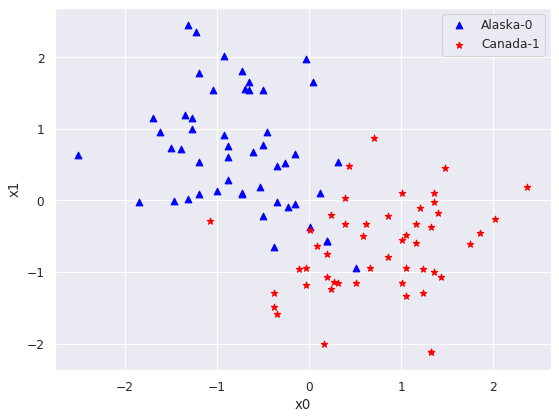

In [4]:
plot_data(X_alaska, X_canada)

## (c)Linear Boundary

### Equation of decision boundary when $\Sigma_0 = \Sigma_1= \Sigma$

$\Sigma = \sum_{i=1}^{m} \frac{(x^{(i)}-\mu_y^{(i)})(x^{(i)}-\mu_y^{(i)})^T}{m}$

$\log(\frac{\phi}{(1-\phi)}) + x^T(\Sigma^{-1}\mu_1- \Sigma^{-1}\mu_0) + \frac{(\mu_0^T\sum^{-1}\mu_0- \mu_1^T\Sigma^{-1}\mu_1)}{2} = 0$

$\theta_0 = \log(\frac{\phi}{(1-\phi)} +\frac{(\mu_0\Sigma^{-1}\mu_0- \mu_1\Sigma^{-1}\mu_1)}{2} $

$[\theta_1 , \theta_2]= \Sigma^{-1}\mu_1- \Sigma^{-1}\mu_0$

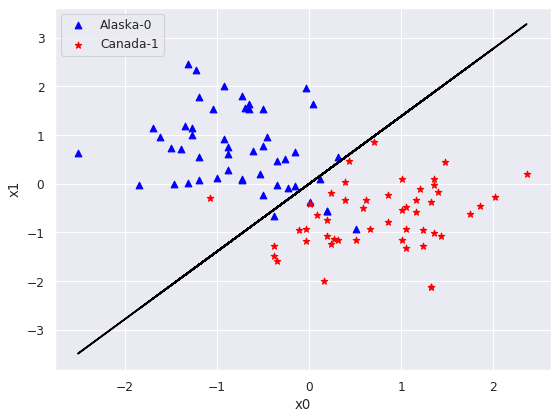

In [5]:
plot_linear(X_norm,X_alaska, X_canada)

## (d) 
$ \Sigma_0 =  [[ 0.38158978 \:,\: -0.15486516]\:$\
              $\quad \quad [-0.15486516\:,\:0.64773717]]$

$\Sigma_1 =  [[0.47747117\:,\:0.1099206 ]$

$\quad \quad[0.1099206\:,\:0.41355441]]$

$\mu_0 = [[-0.75529433\:,\:[ 0.68509431]]$

$\mu_1 = [[ 0.75529433]\:,\:[-0.68509431]]$

In [6]:
cov0= ((X_alaska-mu0.T).T@(X_alaska-mu0.T))/50
cov1= ((X_canada-mu1.T).T@(X_canada-mu1.T))/50
print('sigma0-',cov0)
print('sigma1-',cov1)

sigma0- [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
sigma1- [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


## (e)Quadratic Boundary

$\log(\frac{\phi}{(1-\phi)}) + \frac{1}{2}\log(\frac{|\sum_1|}{|\sum_0|} + x^T\frac{(\sum_0^{-1}-\sum_1^{-1})}{2}x + x^T(\sum_1^{-1}\mu_1- \sum_0^{-1}\mu_0)
+ \frac{\mu_0^T\sum_0^{-1}\mu_0- \mu_1^T\sum_1^{-1}\mu_1}{2} =0$

$\theta_0 + \theta_1 x_1^2 + \theta_2 x_2^2 + \theta_3 x_1 x_2  + \theta_4 x_1 + \theta_5 x_2 =0$

$\theta_0 = \log(\frac{\phi}{(1-\phi)})+ \frac{1}{2}\log(\frac{|\sum_1^{-1}|}{|\sum_0^{-1}|} + \frac{\mu_0^T\sum_0^{-1}\mu_0- \mu_1^T\sum_1^{-1}\mu_1}{2}$

let $A =\frac{(\sum_0^{-1}-\sum_1^{-1})}{2}$ \
$\theta_1 = A_{00}$\
$\theta_2 = A_{11}$\
$\theta_3 = A_{01}+ A_{10}$\
$[\theta_4, \theta_5] = \sum_1^{-1}\mu_1- \sum_0^{-1}\mu_0 $

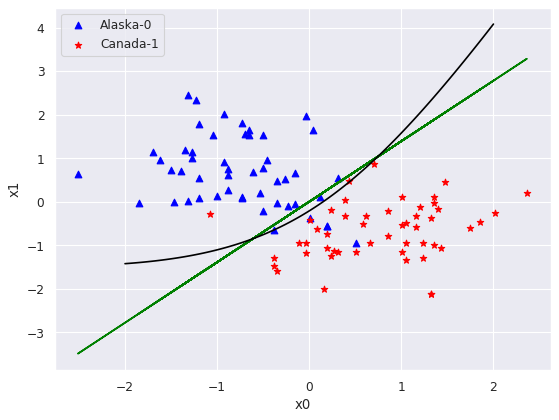

In [7]:
plot_quadratic(X_alaska, X_canada,cov0, cov1)

## (f)Observation

As from observation on plot Quadratic boundary is better classifying the examples than linear boundary.
In linear boundary 4 0's are misclassified as 1's and in quadratic only 2 0's are misclassified as 1's.